In [20]:
# Importing libraries..
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# sampling points
num_samples = 1000000

sample_theta = np.array([[3],[1],[2]])

x0 = np.ones((num_samples,1))
x1 = np.random.normal(3,2,(num_samples,1))
x2 = np.random.normal(-1,2,(num_samples,1))
noise = np.random.normal(0,np.sqrt(2),(num_samples,1))

Y = x0*sample_theta[0][0] + x1*sample_theta[1][0] + x2*sample_theta[2][0] + noise
X = np.append(x0,x1,axis = 1)
X = np.append(X,x2,axis = 1)

In [22]:
#initializing parameters

alpha = 0.001
epsilon = 0.001
max_iter = 10000000000
theta = np.zeros((sample_theta.size,1))
batch_size = 1000
check_size = 2000

cost_list = []
theta_list = [theta]

In [23]:
# helper functions to compute cost, calculate the gradient and train the model..

def cost(X,Y,theta):
    temp = np.dot(X,theta)
    temp = (Y - temp)**2
    this_cost = np.sum(temp)/(2*X.shape[0])
    return this_cost

def cost_grad_update(X,Y,theta,alpha):
    temp = np.dot(X,theta)
    temp = Y - temp
    theta = theta + (alpha*np.dot(X.transpose(),temp))/(X.shape[0])
    return theta

def train(X,Y,theta):
    ax = plt.axes(projection='3d')
    iteration = 0
    finished = False
    curr_cost = 0
    old_cost = 0
    
    plt.figure()
    while(not finished):
        for idx in range(0,num_samples,batch_size):
            
            if(finished):
                break
                
            x_curr = X[idx:idx+batch_size,:]
            y_curr = Y[idx:idx+batch_size,:]
            
            curr_cost += cost(x_curr,y_curr,theta)
            theta = cost_grad_update(x_curr,y_curr,theta,alpha)
            
            if(iteration%check_size==0):
                curr_cost /= check_size
                cost_list.append(curr_cost)
                theta_list.append(theta)
                print("Iteration: "+str(iteration)+" ==> "+ str(abs(curr_cost-old_cost)))
                if(abs(curr_cost-old_cost)<epsilon or iteration>=max_iter):
                    finished = True
                
                old_cost = curr_cost
                curr_cost = 0
            
            if(iteration%(check_size/10)==0):
                ax.scatter3D(theta[0],theta[1],theta[2])
                
            iteration += 1
    
    plt.savefig('../plots/2_d.png')
    print("Learning rate: "+str(alpha))
    print("Batch size used: "+str(batch_size))
    print("Iterations taken: "+str(iteration))
    print("Epsilon for cost used: "+str(epsilon))
    print("Final Parameters: "+str(theta))
    return theta

Iteration: 0 ==> 0.009707531360672662
Iteration: 2000 ==> 2.3943677209245
Iteration: 4000 ==> 1.173892159177578
Iteration: 6000 ==> 0.15060976546311156
Iteration: 8000 ==> 0.050799160234953566
Iteration: 10000 ==> 0.017136399086437493
Iteration: 12000 ==> 0.005782082239404129
Iteration: 14000 ==> 0.001951748320353941
Iteration: 16000 ==> 0.0006592708046702089
Learning rate: 0.001
Batch size used: 1000
Iterations taken: 16001
Epsilon for cost used: 0.001
Final Parameters: [[2.96412909]
 [1.00660542]
 [1.99856062]]


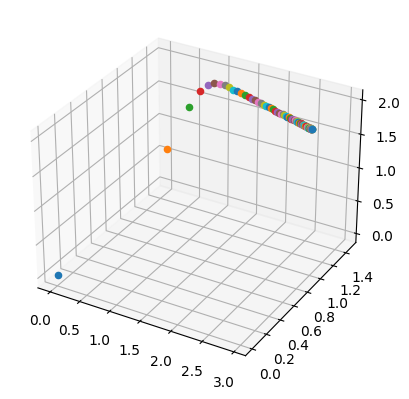

<Figure size 640x480 with 0 Axes>

In [24]:
# training of model
theta = train(X,Y,theta)

In [18]:
# testing on given input

df = pd.read_csv("/Users/sidharthagarwal/Desktop/assignments/ml774/data/q2/q2test.csv")
x0 = np.ones((df['X_1'].shape[0],1))
x1 = np.array(df['X_1']).reshape(-1,1)
x2 = np.array(df['X_2']).reshape(-1,1)

Y_test = np.array(df['Y']).reshape(-1,1)
X_test = np.append(x0,x1,axis = 1)
X_test = np.append(X_test,x2,axis = 1)

error_learned = cost(X_test,Y_test,theta)
error_original = cost(X_test,Y_test,sample_theta)

print("Error for learned model with batch_size = "+str(batch_size)+" : "+str(error_learned))
print("Error for original hypthesis : "+str(error_original))

Error for learned model with batch_size = 1000 : 0.9878664327153518
Error for original hypthesis : 0.9829469215
